## <center> Assignment 2 </center>

#### Name: Qing Dai
#### Student ID: 235821890

You are provided with a training dataset and a testing dataset for a binary classification problem with labels {0,1}. The last column of the training set is the label, while the test dataset contains only attributes.

Train an effective classifier using the training dataset. You are free to choose your data processing approach, the classifier type, and tune the classifier's parameters as needed. You can use the sklearn package in Python for model implementation. 

Make predictions on the testing dataset and generate a file containing only one column of labels (predicted 0 or 1), in the same order as the testing dataset.

Please submit your implementation code and the predicted output file as two separate files (not in a zip) in the names "A2.ipynb" and "prediction.txt". Your assignment will be evaluated based on the performance of your model, specifically its F1-score, among other criteria.

In [97]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('A2_data/train.csv',sep=',',index_col=0) 
df_test_attribute_only = pd.read_csv('A2_data/test_attribute.csv',sep=',',index_col=0) 
print(df_train.head())
print(df_test_attribute_only.head())

      0     1     2     3    4    5     6     7  8
0  0.81  0.85  0.47  0.37  0.5  0.0  0.56  0.22  1
1  0.70  0.58  0.53  0.39  0.5  0.0  0.59  0.22  1
2  0.72  0.73  0.41  0.28  0.5  0.0  0.44  0.22  1
3  0.78  0.69  0.44  0.26  0.5  0.0  0.54  0.22  1
4  0.74  0.82  0.46  0.24  0.5  0.0  0.48  0.22  1
      0     1     2     3    4     5     6     7
0  0.74  0.72  0.50  0.28  0.5  0.00  0.49  0.27
1  0.80  0.88  0.36  0.39  0.5  0.00  0.56  0.33
2  0.57  0.52  0.46  0.20  0.5  0.83  0.52  0.41
3  0.77  0.82  0.40  0.36  0.5  0.00  0.38  0.22
4  0.69  0.60  0.51  0.13  0.5  0.83  0.52  0.22


### Exploratory Data Analysis(EDA) 
understand the characteristics of data such as distributions and correlations, this is a basic for follow up proprocessing of training data
* basis statistics for a general understaning of each column, visulized with boxplot
* skewness and Kurtosis analysis, visualized with histogram
* correlation analysis between attributes and between attributes with result specificly 

Describe the training data
               0           1           2           3           4           5  \
count  652.00000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean     0.50773    0.513037    0.491058    0.271380    0.504601    0.009172   
std      0.12987    0.123411    0.090638    0.138654    0.047780    0.083864   
min      0.19000    0.140000    0.210000    0.000000    0.500000    0.000000   
25%      0.42000    0.430000    0.440000    0.170000    0.500000    0.000000   
50%      0.49000    0.500000    0.510000    0.230000    0.500000    0.000000   
75%      0.58000    0.580000    0.550000    0.340000    0.500000    0.000000   
max      0.92000    1.000000    1.000000    0.800000    1.000000    0.830000   

                6           7           8  
count  652.000000  652.000000  652.000000  
mean     0.503482    0.255245    0.098160  
std      0.054488    0.081545    0.297759  
min      0.130000    0.010000    0.000000  
25%      0.480000    0.220000   

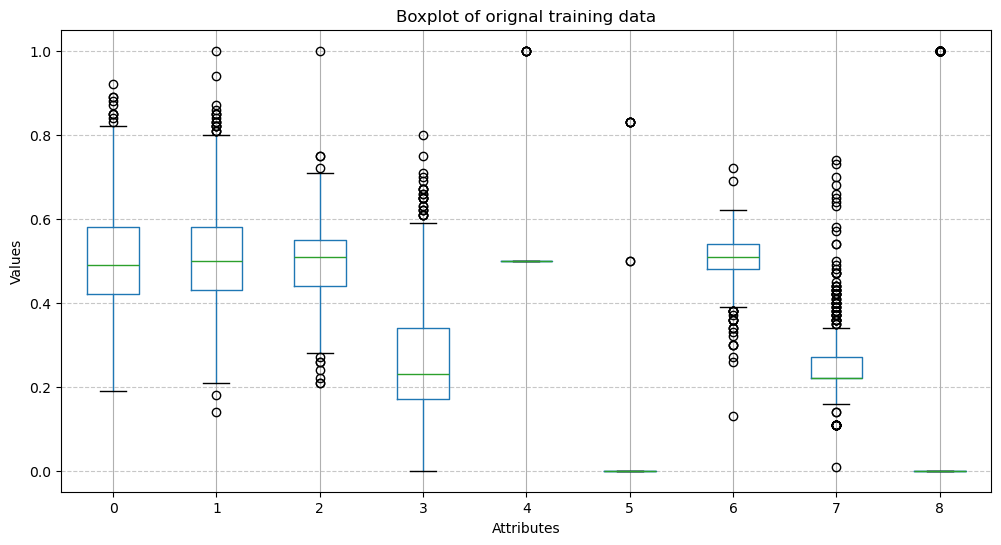

In [98]:
#print the statistics of data 
df_train_x = df_train.drop(columns=['8'])
#df_train_y = df_train[:,-1]

print("Describe the training data")
print(df_train.describe())
# print("Describe the testing data")
# print(df_test_attribute_only.describe())


# check if need to 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

df_train.boxplot()
plt.title('Boxplot of orignal training data')
plt.xlabel('Attributes')
plt.ylabel('Values')
# plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



skewness of training data
0     0.545921
1     0.545517
2    -0.160764
3     1.159888
4    10.303601
5     9.284937
6    -1.339156
7     2.523775
8     2.707407
dtype: float64
kurtosis of training data
0      0.298679
1      0.609092
2      1.498399
3      0.852621
4    104.484687
5     85.990905
6      5.525437
7      9.573947
8      5.346444
dtype: float64


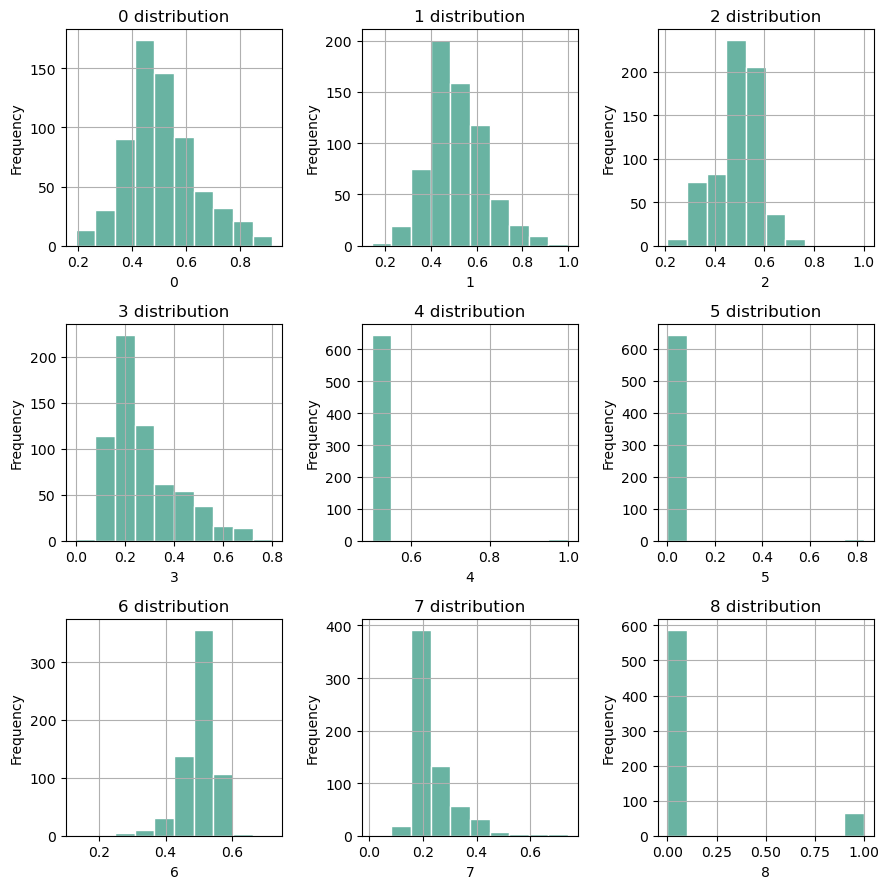

In [99]:
#examine skewness of the data to determin if any transformation is needed
print("skewness of training data")
print(df_train.skew(axis='index'))

print("kurtosis of training data")
print(df_train.kurt(axis="index"))

# draw histogram of all columns
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_train.columns):
    
    # Add the histogram
    df_train[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

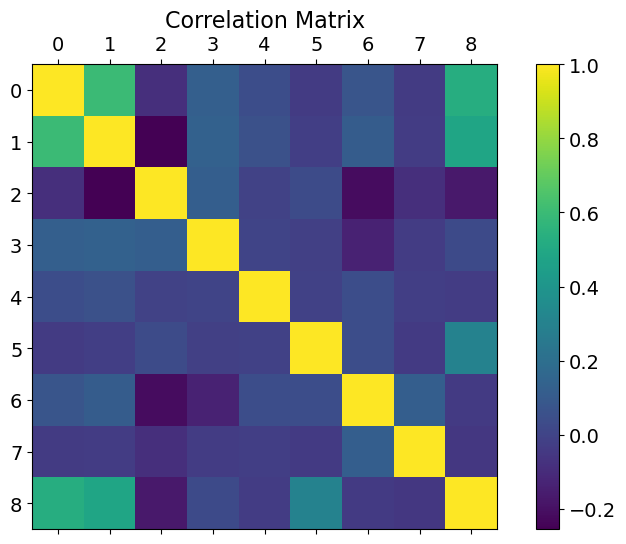

In [100]:
# correlation analysis to determin if dimentional reduction should be proposed. 
f = plt.figure(figsize=(10, 6))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

### Proprocessing/Feature Engineering
#### Brief summary of the charastics of found of training data
Good points of the quality of training data
* no missing data
* all attributes are numerical, easy to apply regression models on

To-be-improved points of training data
* data is NOT normalized and attribute 4, 5 is super extrem cases with almost zero variance of data
* skewness of column 3, 6 is high, 7,8 is higher while 
* attribute 0 & 1 is highly correlated with each other 
#### preprocessing technique to be applied
* reduce dimentions on near-zero variance 
* transform on skewed data to make it more symmetrically distributed
* normalize training data 

propotion of outliers of attribute 4 = 0.009 
propotion of outliers of attribute 4 in test data = 0.011 
propotion of outliers of attribute 5 = 0.012 
propotion of outliers of attribute 5 in test data= 0.020 


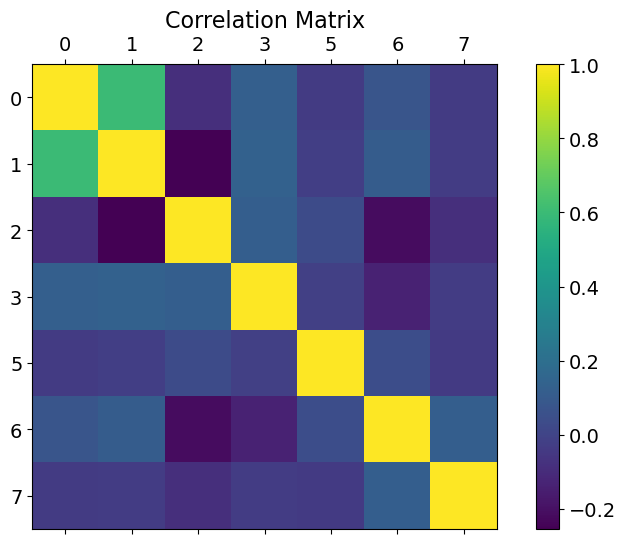

In [101]:
attr4 = df_train['4']
print("propotion of outliers of attribute 4 = %.3f " % (len(attr4[(attr4!=0.5)])/len(attr4)))

attr4 = df_test_attribute_only['4']
print("propotion of outliers of attribute 4 in test data = %.3f " % (len(attr4[(attr4!=0.5)])/len(attr4)))

attr5 = df_train['5']
print("propotion of outliers of attribute 5 = %.3f " % (len(attr5[(attr5!=0)])/len(attr5)))

attr5 = df_test_attribute_only['5']
print("propotion of outliers of attribute 5 in test data= %.3f " % (len(attr5[(attr5!=0)])/len(attr5)))

#elimite attribute 4 &5 which is almost constants with few outlier 
df_train_x = df_train.drop(columns=['4', '8'])
df_train_y = df_train['8']

# correlation after 
f = plt.figure(figsize=(10, 6))
plt.matshow(df_train_x.corr(), fignum=f.number)
plt.xticks(range(df_train_x.select_dtypes(['number']).shape[1]), df_train_x.select_dtypes(['number']).columns, fontsize=14)
plt.yticks(range(df_train_x.select_dtypes(['number']).shape[1]), df_train_x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()


skewness of training data before and after transform
0     0.545921
1     0.545517
2    -0.160764
3     1.159888
4    10.303601
5     9.284937
6    -1.339156
7     2.523775
8     2.707407
dtype: float64
0    0.545921
1    0.545517
2   -0.160764
3    0.610995
5    9.284937
6   -2.036515
7    2.072302
dtype: float64
kurtosis of training data before and after transform
0      0.298679
1      0.609092
2      1.498399
3      0.852621
4    104.484687
5     85.990905
6      5.525437
7      9.573947
8      5.346444
dtype: float64
0     0.298679
1     0.609092
2     1.498399
3     0.129176
5    85.990905
6    10.757617
7     7.199699
dtype: float64


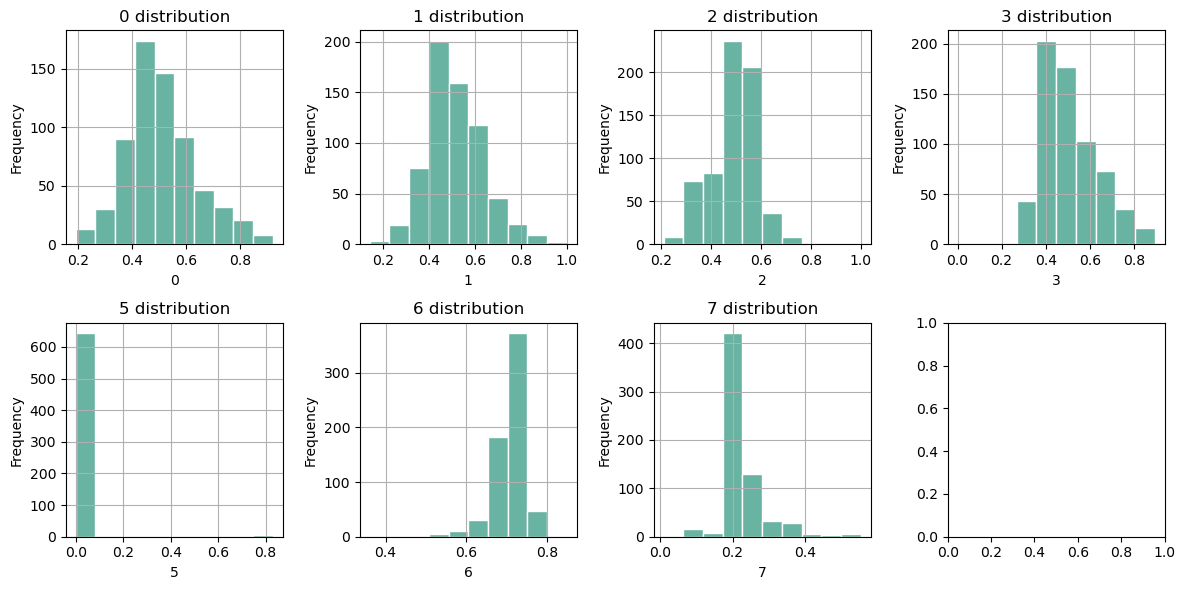

In [102]:
# Transform the skewness of data according to instuction on https://anatomisebiostats.com/biostatistics-blog/transforming-skewed-data/
# squeare root transform on moderate skewed data
df_train_x['3']= (df_train_x['3'])**(1/2)
df_train_x['6']= (df_train_x['6'])**(1/2)
# log  transform on highly skewed data
df_train_x['7']= np.log(df_train_x['7']+1)

# attr 5 is too extrem to take any meaningful transform

print("skewness of training data before and after transform")
print(df_train.skew(axis='index'))
print(df_train_x.skew(axis='index'))

print("kurtosis of training data before and after transform")
print(df_train.kurt(axis="index"))
print(df_train_x.kurt(axis="index"))

# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_train_x.columns):
    
    # Add the histogram
    df_train_x[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

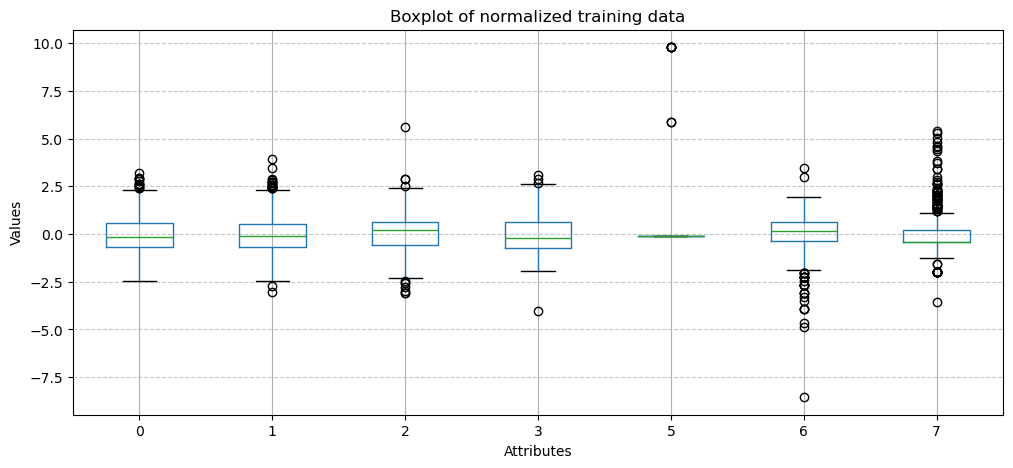

In [103]:
# normalize training data
df_train_x=(df_train_x-df_train_x.mean())/df_train_x.std()

# Create a dot plot
plt.figure(figsize=(12, 5))

df_train_x.boxplot()
plt.title('Boxplot of normalized training data')
plt.xlabel('Attributes')
plt.ylabel('Values')
# plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Model generation and applicaion on predit data
#### Model Selection
Since the nature of attributes are numerical, regressional model should be chosen for training. To immprove the performance of model, ensambling technique are also applied.
#### Model Envaluation
As requred in the assignment, f1 score is the major evalution standard in training the data. 
Cross-validation is applied in training model, and RocCurve is used to visulize the progress of each validation

Let's begin with model selection process on arbitory chosen seperation of training data

In [104]:
from sklearn.model_selection import train_test_split
df_train_x.shape, df_train_y.shape

X_train, X_test, y_train, y_test = train_test_split(
    df_train_x, df_train_y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_splits = 5

(456, 7) (456,)
(196, 7) (196,)


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=n_splits)
#fit model to training data
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 3}


In [106]:
from sklearn.ensemble import RandomForestClassifier

#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=n_splits)

#fit model to training data
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [107]:
from sklearn.linear_model import LogisticRegression

#create a new logistic regression model
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [108]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

from sklearn.ensemble import VotingClassifier
#create a dictionary of candidate models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
score = ensemble.score(X_test, y_test)

print("score after ensemble the data: %.4f" % score)

knn: 0.9489795918367347
rf: 0.9489795918367347
log_reg: 0.9489795918367347
score after ensemble the data: 0.9490


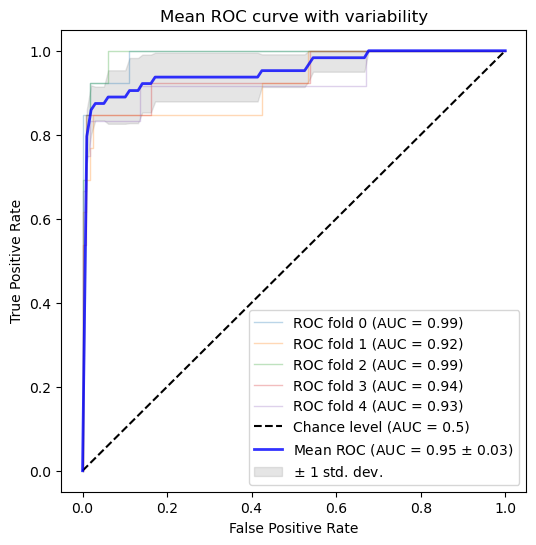

In [109]:
# Visulaize the score of cross-validation this is for demostration only, the final predictor is ensembled classifier
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay,auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=n_splits)

classifier  = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(df_train_x, df_train_y)):
    classifier.fit(df_train_x, df_train_y)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        df_train_x.loc(axis=0)[test],
        df_train_y.loc(axis=0)[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.legend(loc="lower right")
plt.show()

### prediction on test data and export
Before prediction, same preprocessing applied on traning data should be applied on test data as well, including
* Dimension reduction on test data 
* Transformation on skewness to make the data more specific
* Normalization
After predition, we need exprot the result in the format required at the beginning of assignment

skewness of test data
0    0.458555
1    0.480156
2    0.148564
3    0.925730
5    7.273734
6   -2.176808
7    2.548306
dtype: float64
kurtosis of test
0     0.112718
1     0.396001
2     1.916094
3     0.451212
5    52.331217
6    12.747930
7    12.328766
dtype: float64


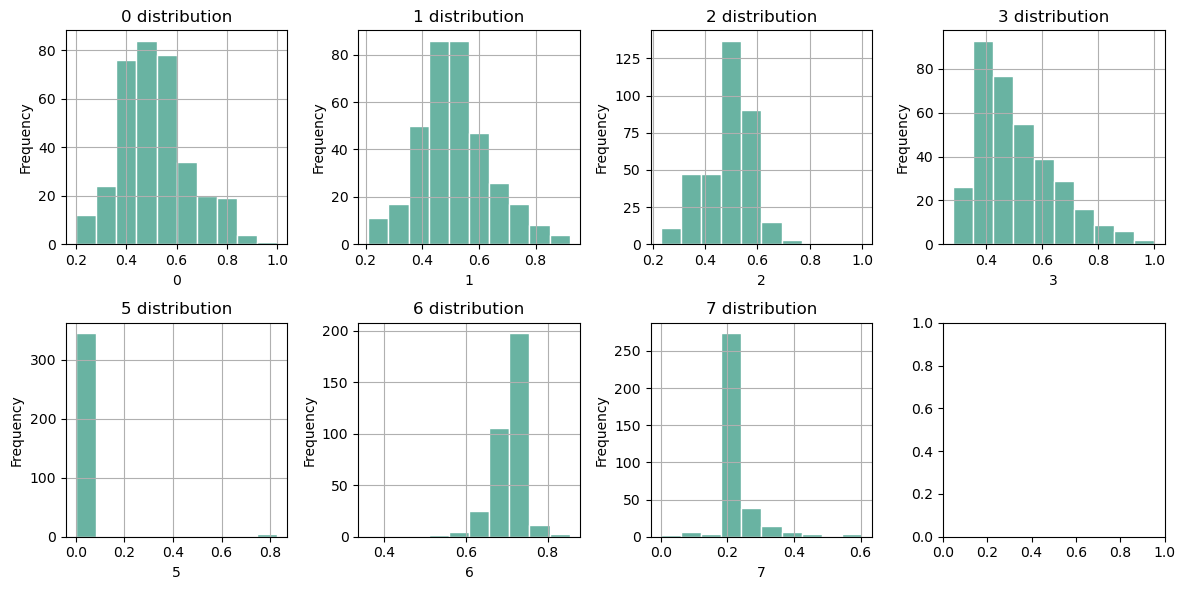

In [110]:
# Dimension Reduction
test_data = df_test_attribute_only.drop(columns=['4'])

# squeare root transform on moderate skewed data
test_data['3']= (test_data['3'])**(1/2)
test_data['6']= (test_data['6'])**(1/2)
# log transform on highly skewed data
test_data['7']= np.log(test_data['7']+1)

# attr 5 is too extreme
# df_train_x['5']= np.log10(df_train_x['5'])

print("skewness of test data")
print(test_data.skew(axis='index'))

print("kurtosis of test")
print(test_data.kurt(axis="index"))

# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(test_data.columns):
    
    # Add the histogram
    test_data[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

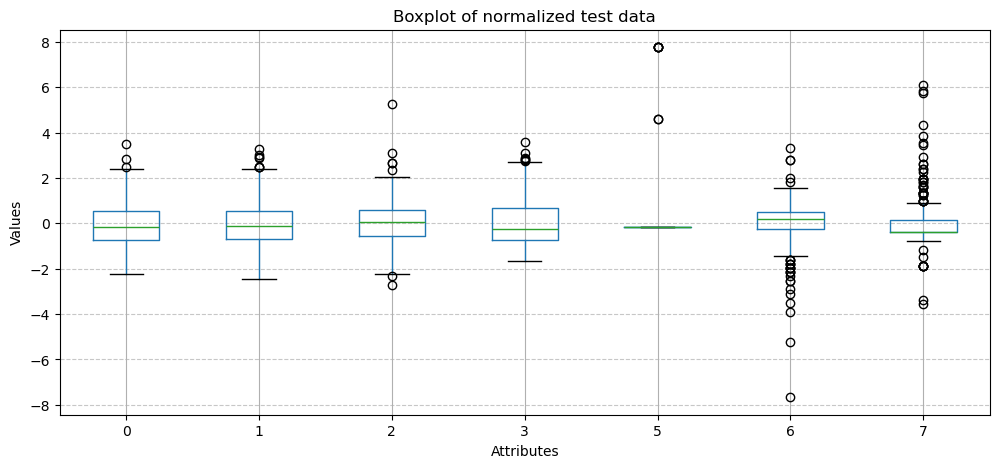

In [111]:
# normalize test data
test_data=(test_data-test_data.mean())/test_data.std()

# Create a dot plot
plt.figure(figsize=(12, 5))

test_data.boxplot()
plt.title('Boxplot of normalized test data')
plt.xlabel('Attributes')
plt.ylabel('Values')
# plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [112]:
#Transform on skewness
result= ensemble.predict(test_data)
print(result)

#write the result to 
df = pd.DataFrame(result.transpose())
df.to_csv('prediction.txt',sep=' ', index=False, lineterminator=',')

[1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Summary of Fine-tuning of the model
#### skewness transform
Largely, by transform the skewness of transform, the score of model on average has improved from 80+% to 90+% 
Tricky part is the decision on whether to include attributes 5, despite of its near-zero variance, it has higher correlation with the target(dtat_train_y) than most of other attributes. By adding it into the training, the score improved further evidently! That's why i added it back to the model. 
#### ensemble and hyper parameter optimization
Grid Search algorithm help to find the best performance of different parameter of same classifier.
Ensemble mechanism is applied to try to get the best result between 

#### highly correlated attributes
There're some noticible high correlation between some of attributes, e.g. corr between 0 & 1 is larger than 0.6, 3 has moderate correlation value with some other attributes, it is reasonable to believe that the training data set can be shrinked by 1~2 dimention using PCA or similar trick. However, because the performance of model is good enough for accuracy, we can turn to this technique later, espeically when the training computational power for the model is hugh. 